In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import glob

In [4]:
# Defining function to display images
def display(img, cmap = None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

In [6]:
patch = cv2.imread('sweat_rate_test.jpg')
#patch_RGB = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)

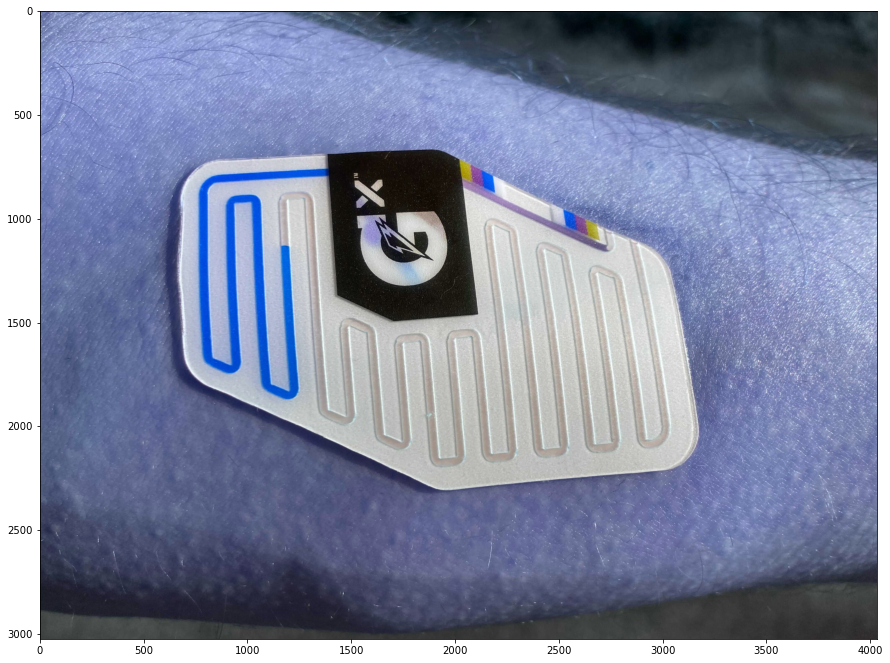

In [7]:
display(patch)

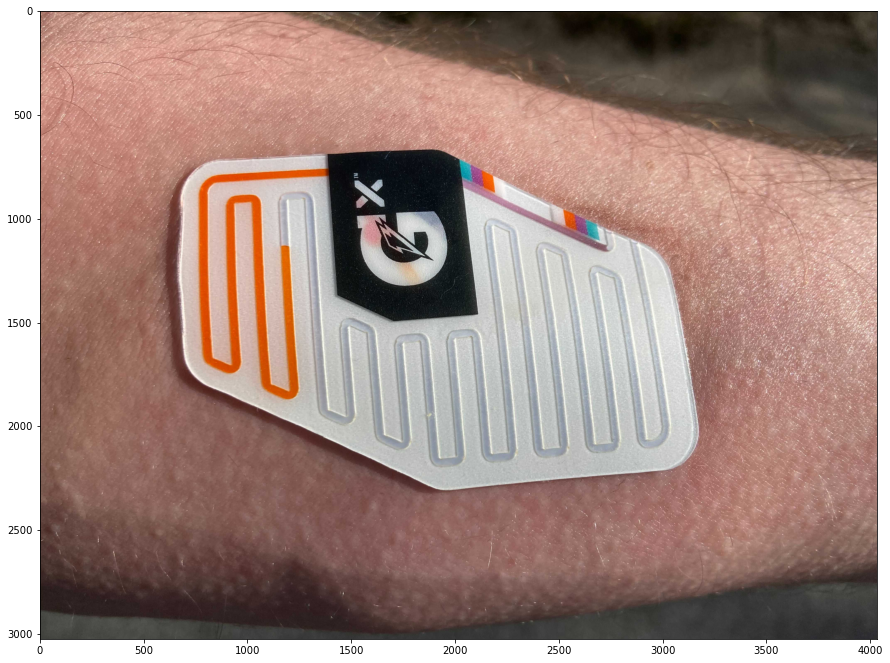

In [16]:
#convert to RGB to display
patch_RGB = cv2.cvtColor(patch,cv2.COLOR_BGR2RGB)
display(patch_RGB)

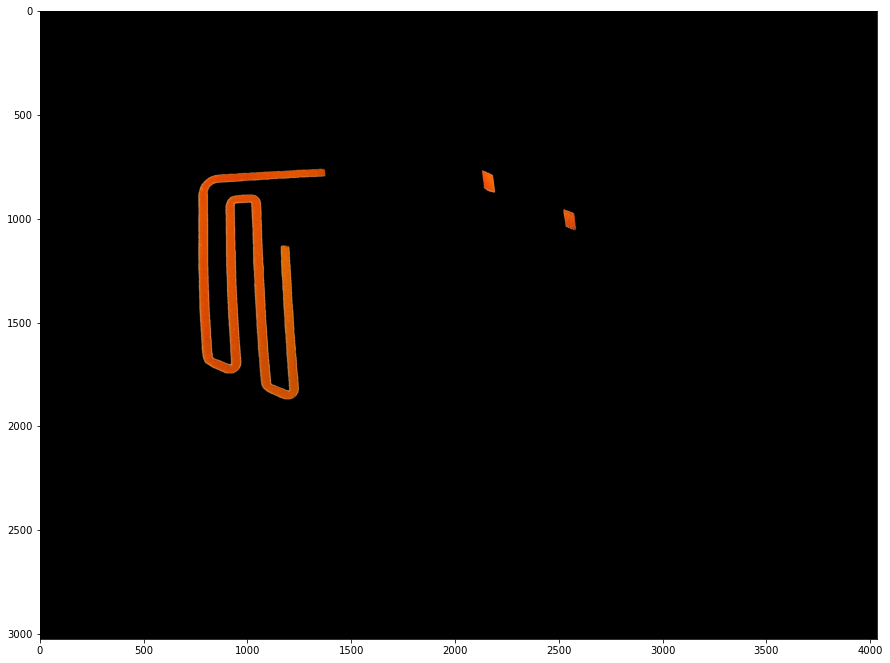

In [9]:
#Convert the images to HSV scale and threshold using appropriate values
light_orange = (5, 120, 180)
# dark_orange = (0, 89, 253)
dark_orange = (30, 255, 255)
patch_HSV = cv2.cvtColor(patch_RGB, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(patch_HSV,light_orange,dark_orange)
result = cv2.bitwise_and(patch_RGB,patch_RGB, mask=mask)
display(result)

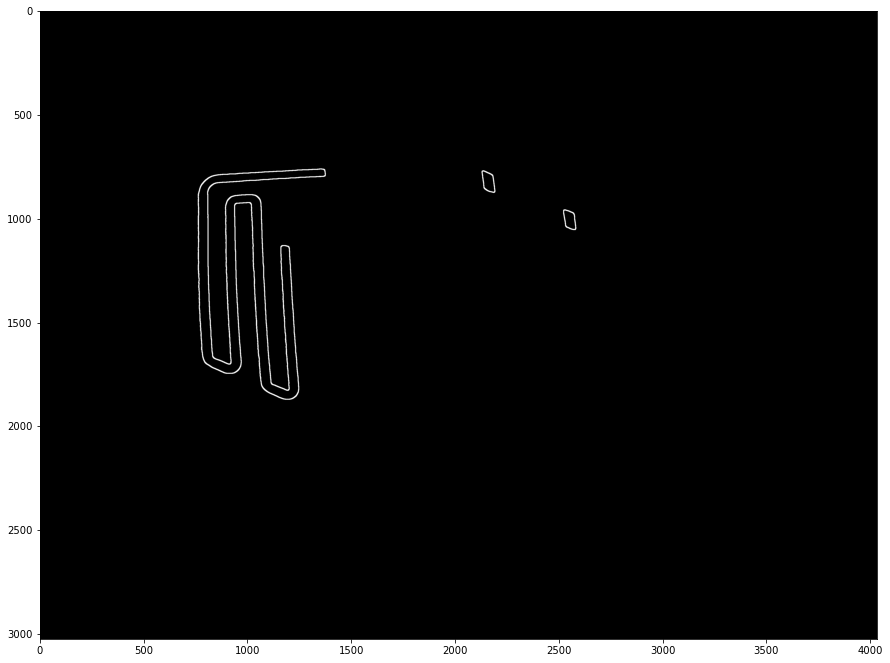

In [10]:
image = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
template = cv2.medianBlur(image, 13)
template = cv2.Canny(template, 160, 200)
kernel = np.ones((3, 3), np.uint8)
template = cv2.dilate(template, kernel, iterations =2)
display(template, cmap='gray')

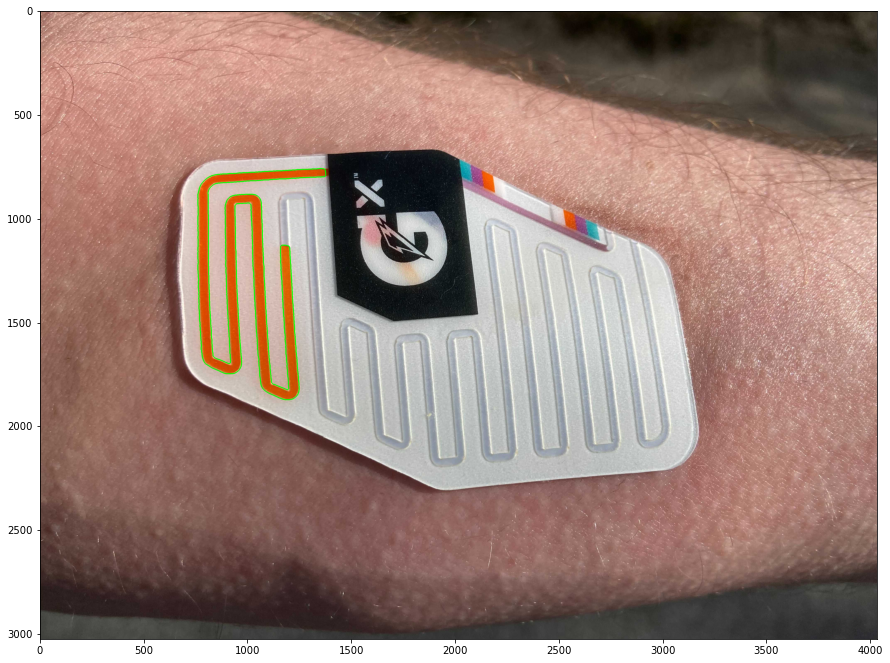

In [17]:
contours, hierarchy = cv2.findContours(template,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
cv2.drawContours(patch_RGB, contours,2, (0, 255, 0), 3) 
display(patch_RGB)

In [12]:
len(contours)

3

In [18]:
area = cv2.contourArea(contours[2])
area

205861.5